# Superconductivity in VCA on a 4-site cluster

- Construct a Hubbard model based on a $2\times2$ cluster where several types of superconductivity are defined:

    - On-site, $s$-wave pairing :
    $$ \hat\Delta = \sum_\mathbf{r} ( c_{\mathbf{r}\uparrow} c_{\mathbf{r}\downarrow} + \text{H.c})$$

    - extended $s$-wave pairing : 
    $$ \hat\Delta = \sum_\mathbf{r} \big[ (c_{\mathbf{r}\uparrow} c_{\mathbf{r}+\hat{x}\downarrow} - c_{\mathbf{r}\downarrow} c_{\mathbf{r}+\hat{x}\uparrow}) + (c_{\mathbf{r}\uparrow} c_{\mathbf{r}+\hat{y}\downarrow} - c_{\mathbf{r}\downarrow} c_{\mathbf{r}+\hat{y}\uparrow}) + \text{H.c}\big] $$

    - singlet, $d_{x^2-y^2}$-wave pairing : 
    $$ \hat\Delta = \sum_\mathbf{r} \big[ (c_{\mathbf{r}\uparrow} c_{\mathbf{r}+\hat{x}\downarrow} - c_{\mathbf{r}\downarrow} c_{\mathbf{r}+\hat{x}\uparrow}) - (c_{\mathbf{r}\uparrow} c_{\mathbf{r}+\hat{y}\downarrow} - c_{\mathbf{r}\downarrow} c_{\mathbf{r}+\hat{y}\uparrow}) + \text{H.c}\big] $$

    - singlet, $d_{xy}$-wave pairing : 
    $$ \hat\Delta = \sum_\mathbf{r} \big[ (c_{\mathbf{r}\uparrow} c_{\mathbf{r}+\hat{x}+\hat{y}\downarrow} - c_{\mathbf{r}\downarrow} c_{\mathbf{r}+\hat{x}+\hat{y}\uparrow}) - (c_{\mathbf{r}\uparrow} c_{\mathbf{r}+\hat{y}-\hat{x}\downarrow} - c_{\mathbf{r}\downarrow} c_{\mathbf{r}+\hat{y}-\hat{x}\uparrow}) + \text{H.c}\big] $$

    (notation : $\hat{x}$ and $\hat{y}$ are the unit lattice vectors in the $x$ and $y$ directions, respectively.)
    
    
- Show how the Potthoff functional $\Omega$ depends on the superconducting Weiss field for each of the cases defined above.

- In the case of $d_{x^2-y^2}$-wave pairing and $U=8$, obtain the VCA solution for a hole-doped system as a function of chemical potential (or doping) for the range of doping where the solution is nontrivial. Plot the superconducting order parameter as a function of doping $x=1-n$, ($n$ begin the electron density).



In [1]:
from pyqcm import *
from pyqcm.draw_operator import *
from pyqcm.vca import *
from pyqcm.loop import controlled_loop

import numpy as np

import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")

import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 150

Number of openMP threads = 4


In [2]:
# Defining a simple 2x2 cluster and inserting into a square-tiled lattice
new_cluster_model("clus", 4, 0)
add_cluster("clus", [0,0,0], [[0,0,0], [1,0,0], [0,1,0], [1,1,0]])
lattice_model("2D_2x2", [[2,0,0],[0,2,0]])

In [3]:
# Adding the typical Hubbard style operators
interaction_operator("U")
hopping_operator("t", [1,0,0], -1)
hopping_operator("t", [0,1,0], -1)

### It is now time to define a few operators representing superconductivity with singlet pairing

In [4]:
# On-site s-wave
anomalous_operator("S", [0,0,0], 1)

# Extended s-wave
anomalous_operator("exS", [1,0,0], 1)
anomalous_operator("exS", [0,1,0], 1)

# d_{x^2-y^2}-wave
anomalous_operator("Dx2-y2", [1,0,0], 1)
anomalous_operator("Dx2-y2", [0,1,0], -1)

# d_{xy}-wave, similar as previous wave but defined with "diagonal" links
anomalous_operator("Dxy", [1,1,0], 1)
anomalous_operator("Dxy", [-1,1,0], -1)

In [5]:
# Defining the appropriate sector of Hilbert space
set_target_sectors(["R0:S0"])

# The first three parameters are used for the graph of the Potthoff functionnal
set_parameters("""
    t=1
    U=8
    mu=1.2
    S_1=1e-9
    exS_1=1e-9
    Dx2-y2_1=1e-9
    Dxy_1=1e-9
""")

[('t', 1.0),
 ('U', 8.0),
 ('mu', 1.2),
 ('S_1', 1e-09),
 ('exS_1', 1e-09),
 ('Dx2-y2_1', 1e-09),
 ('Dxy_1', 1e-09)]

In [6]:
# Generating a grid for the Potthoff functionnals
grid_size = 50
Delta_grid = np.linspace(0.0, 0.3, grid_size)

global parameter accur_SEF set to 0.0001
omega( 0.0 ) =  -1.7835766502191663
omega( 0.006122448979591836 ) =  -1.7835897616394822
omega( 0.012244897959183673 ) =  -1.78362861603042
omega( 0.01836734693877551 ) =  -1.783691627136404
omega( 0.024489795918367346 ) =  -1.783774063683911
omega( 0.030612244897959183 ) =  -1.7838735955980014
omega( 0.03673469387755102 ) =  -1.7840035258452684
omega( 0.04285714285714286 ) =  -1.7841542334542648
omega( 0.04897959183673469 ) =  -1.784325917988538
omega( 0.055102040816326525 ) =  -1.7845187395821982
omega( 0.061224489795918366 ) =  -1.784730415426372
omega( 0.0673469387755102 ) =  -1.7849622232046283
omega( 0.07346938775510203 ) =  -1.7852135220947702
omega( 0.07959183673469387 ) =  -1.7854839945992318
omega( 0.08571428571428572 ) =  -1.785773494297691
omega( 0.09183673469387754 ) =  -1.7860818360680364
omega( 0.09795918367346938 ) =  -1.7864088171920462
omega( 0.10408163265306122 ) =  -1.7867540759483966
omega( 0.11020408163265305 ) =  -1.787117

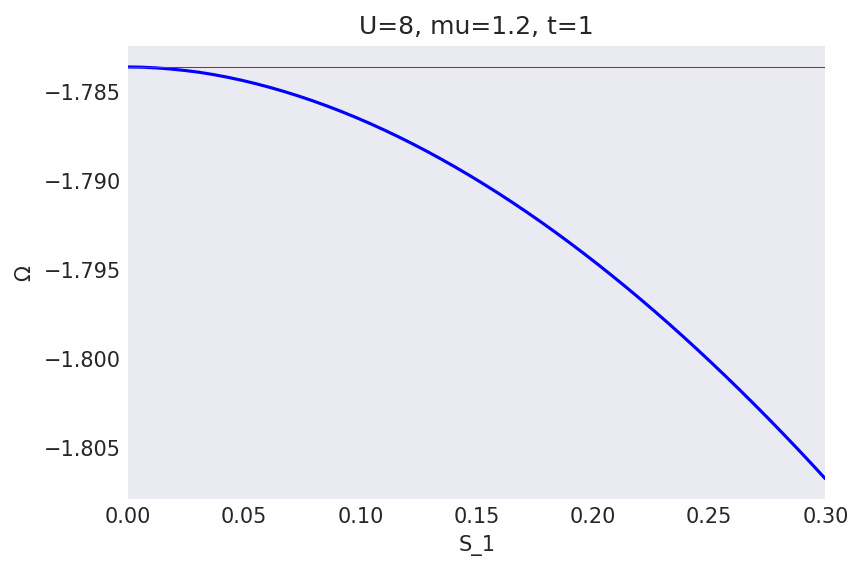

global parameter accur_SEF set to 0.0001
omega( 0.0 ) =  -1.7835766502191681
omega( 0.006122448979591836 ) =  -1.7835673059092283
omega( 0.012244897959183673 ) =  -1.7835361346930965
omega( 0.01836734693877551 ) =  -1.7834855107591396
omega( 0.024489795918367346 ) =  -1.7834146655349303
omega( 0.030612244897959183 ) =  -1.7833223676579653
omega( 0.03673469387755102 ) =  -1.7832112561544664
omega( 0.04285714285714286 ) =  -1.7830800656452614
omega( 0.04897959183673469 ) =  -1.7829288431144978
omega( 0.055102040816326525 ) =  -1.782757667971803
omega( 0.061224489795918366 ) =  -1.782566609387831
omega( 0.0673469387755102 ) =  -1.7823559245776
omega( 0.07346938775510203 ) =  -1.7821252078669272
omega( 0.07959183673469387 ) =  -1.7818687722765465
omega( 0.08571428571428572 ) =  -1.78159963180525
omega( 0.09183673469387754 ) =  -1.781310501406067
omega( 0.09795918367346938 ) =  -1.7810026251672288
omega( 0.10408163265306122 ) =  -1.7806756893710975
omega( 0.11020408163265305 ) =  -1.7803288

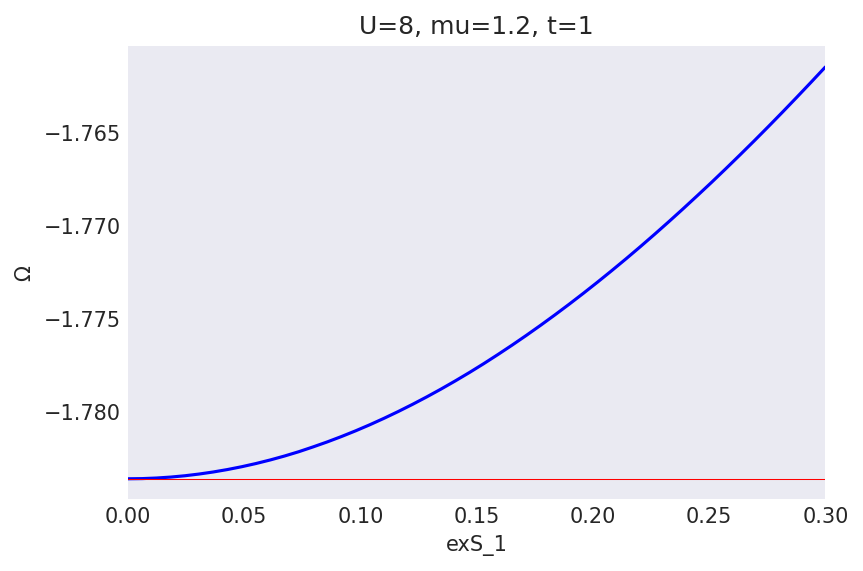

omega( global parameter accur_SEF set to 0.0001
0.0 ) =  -1.78357665021917
omega( 0.006122448979591836 ) =  -1.7837117319847944
omega( 0.012244897959183673 ) =  -1.784123924476736
omega( 0.01836734693877551 ) =  -1.7847585045869987
omega( 0.024489795918367346 ) =  -1.7855806059902424
omega( 0.030612244897959183 ) =  -1.7865478521886113
omega( 0.03673469387755102 ) =  -1.7876262209905827
omega( 0.04285714285714286 ) =  -1.7887792085481766
omega( 0.04897959183673469 ) =  -1.789977010774645
omega( 0.055102040816326525 ) =  -1.79119152911516
omega( 0.061224489795918366 ) =  -1.792376002820094
omega( 0.0673469387755102 ) =  -1.7935235249886048
omega( 0.07346938775510203 ) =  -1.7946175036123364
omega( 0.07959183673469387 ) =  -1.7956381340904815
omega( 0.08571428571428572 ) =  -1.7965767676599846
omega( 0.09183673469387754 ) =  -1.7974247451223957
omega( 0.09795918367346938 ) =  -1.7981813072267134
omega( 0.10408163265306122 ) =  -1.7988419733068208
omega( 0.11020408163265305 ) =  -1.799404

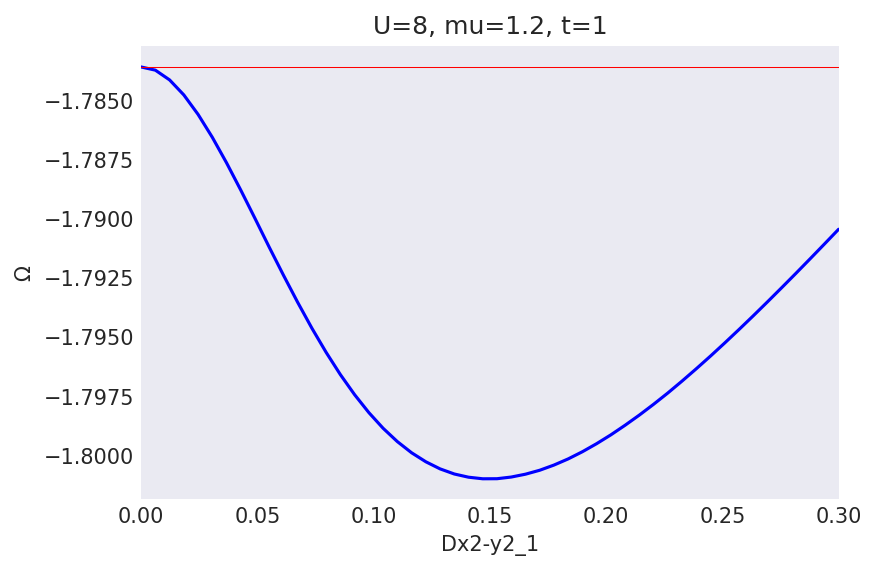

global parameter accur_SEF set to 0.0001
omega( 0.0 ) =  -1.7835766502191657
omega( 0.006122448979591836 ) =  -1.7835842285245191
omega( 0.012244897959183673 ) =  -1.783606193076719
omega( 0.01836734693877551 ) =  -1.7836422459959718
omega( 0.024489795918367346 ) =  -1.7836906789731464
omega( 0.030612244897959183 ) =  -1.7837440351367877
omega( 0.03673469387755102 ) =  -1.7838179905042937
omega( 0.04285714285714286 ) =  -1.7839048410964968
omega( 0.04897959183673469 ) =  -1.7840039817065034
omega( 0.055102040816326525 ) =  -1.7841158469100866
omega( 0.061224489795918366 ) =  -1.7842396970541525
omega( 0.0673469387755102 ) =  -1.784375889909259
omega( 0.07346938775510203 ) =  -1.7845216974128366
omega( 0.07959183673469387 ) =  -1.7846824169937396
omega( 0.08571428571428572 ) =  -1.7848562943856785
omega( 0.09183673469387754 ) =  -1.7850402074432157
omega( 0.09795918367346938 ) =  -1.7852362165585083
omega( 0.10408163265306122 ) =  -1.7854442072543837
omega( 0.11020408163265305 ) =  -1.7

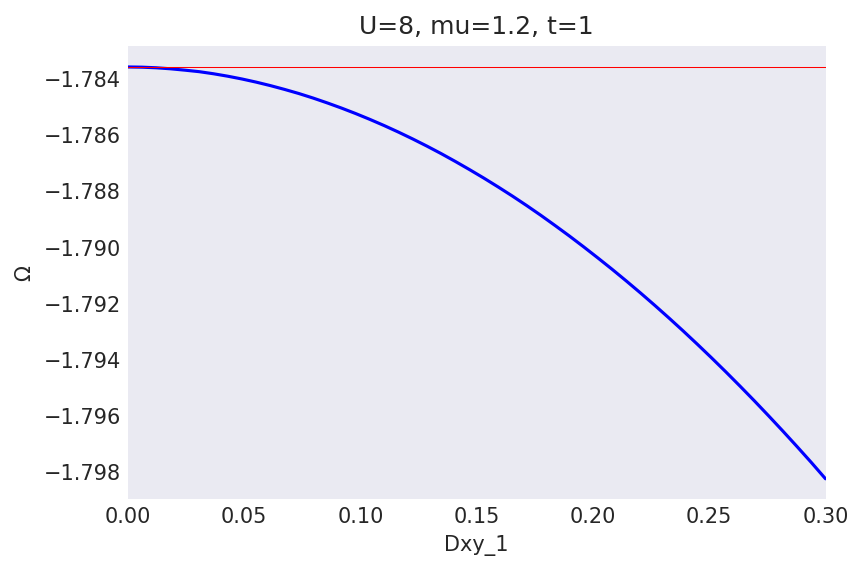

In [7]:
# The different types of superconductivity are explored by plotting the Potthoff functionnal for each variety
######################### - On-site s-wave - #########################
set_parameter("S_1", 1)
set_parameter("exS_1", 1e-9)
set_parameter("Dx2-y2_1", 1e-9)
set_parameter("Dxy_1", 1e-9)
new_model_instance()

plot_sef("S_1", Delta_grid)

######################### - Extended s-wave - #########################
set_parameter("S_1", 1e-9)
set_parameter("exS_1", 1)
set_parameter("Dx2-y2_1", 1e-9)
set_parameter("Dxy_1", 1e-9)
new_model_instance()

plot_sef("exS_1", Delta_grid)

######################### - d_{x^2 - y^2}-wave - #########################

set_parameter("S_1", 1e-9)
set_parameter("exS_1", 1e-9)
set_parameter("Dx2-y2_1", 1)
set_parameter("Dxy_1", 1e-9)
new_model_instance()

plot_sef("Dx2-y2_1", Delta_grid)

######################### - d_{xy}-wave - #########################

set_parameter("S_1", 1e-9)
set_parameter("exS_1", 1e-9)
set_parameter("Dx2-y2_1", 1e-9)
set_parameter("Dxy_1", 1)
new_model_instance()

plot_sef("Dxy_1", Delta_grid)

In [8]:
# Loading the sef.tsv file into an array
raw_data = np.genfromtxt("./sef.tsv", delimiter="\t", usecols=[1])
data = raw_data[-4*grid_size-4:] # reading the last 4 sef simulation blocks accounting for the "omega" header

# Loading each superconducting sef into an array
omega_1 = data[1:grid_size+1]
omega_2 = data[grid_size+2:2*grid_size+2]
omega_3 = data[2*grid_size+3:3*grid_size+3]
omega_4 = data[3*grid_size+4:4*grid_size+4]

/tmp/ipykernel_25885/1449009887.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


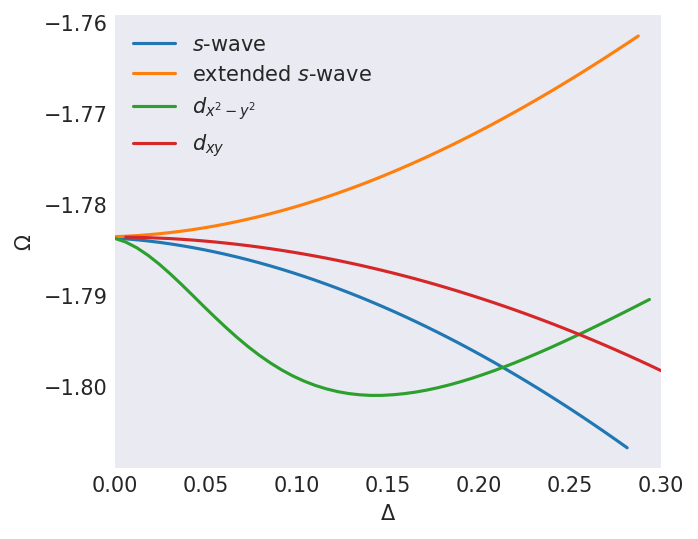

In [9]:
# Plotting all Potthoff functionnals in the same graph
fig, ax = plt.subplots()

ax.plot(Delta_grid, omega_1, label="$s$-wave")
ax.plot(Delta_grid, omega_2, label="extended $s$-wave")
ax.plot(Delta_grid, omega_3, label="$d_{x^2 - y^2}$")
ax.plot(Delta_grid, omega_4, label="$d_{xy}$")

ax.set_aspect(5)
ax.set_xlim((0.0, 0.3))

ax.legend()
ax.set_xlabel("$\Delta$")
ax.set_ylabel("$\Omega$")

fig.show()

### Interpretation of the Potthoff functionnals

As seen in the above plot, the only functionnal that admits a minimum is the one related to $d_{x^2 - y^2}$ superconduction. This implies that it's also the "appropriate" form of superconduction for the model we have defined.

In [10]:
# Loop_parameters
mu_start = 1.2
mu_stop = 2.8
mu_step = 0.05

In [11]:
# Setting parameters for a VCA around d_{x^2-y^2} superconduction
set_parameter("S_1", 1e-9)
set_parameter("exS_1", 1e-9)
set_parameter("Dx2-y2_1", 0.15) # Starting parameter for the VCA
set_parameter("Dxy_1", 1e-9)
new_model_instance()

# Defining a fucntion that runs the appropriate VCA every time func() is called in controlled_loop()
def run_vca():
    vca(names=["Dx2-y2_1"], steps=[0.01], accur=[2e-3], max=[100], max_iter=60)

controlled_loop(func=run_vca, varia=["Dx2-y2_1"], loop_param="mu", loop_range=(mu_start, mu_stop, mu_step))


%%%%%%%%%%%%%%%%%%%%%%%%%%% controlled loop over mu %%%%%%%%%%%%%%%%%%%%%%%%%%%


========================= loop index = 1, mu = 1.2000 =========================

******************************** VCA procedure ********************************
Dx2-y2_1  =  0.1500	
x =  [ 0.15]
x =  [ 0.16]
x =  [ 0.14]
QN iteration no  1 	 x =  [ 0.149838]
convergence on position after  1  iterations
x =  [ 0.149838]
saddle point =  [ 0.149838]
gradient =  [ 0.000294]
second derivatives : [ 1.819965]
computing properties of converged solution...
omega =  -1.8009832880053531
****************************** VCA ended normally ******************************
predictor :  [ 0.149838] 
 --->  Dx2-y2_1  =  0.14983819492295758

========================= loop index = 2, mu = 1.2500 =========================

******************************** VCA procedure ********************************
Dx2-y2_1  =  0.1498	
x =  [ 0.149838]
x =  [ 0.159838]
x =  [ 0.139838]
QN iteration no  1 	 x =  [ 0.170783]
x =  [ 0.170783]


In [12]:
# Creating a grid for the plot
mu_grid = np.arange(mu_start, mu_stop, mu_step)

# Loading the vca.tsv file into an array
raw_vca_data = np.genfromtxt("./vca.tsv", delimiter="\t", usecols=[3, 10, 12])
vca_data = raw_vca_data[-len(mu_grid):] # loading the appropriate VCA simulations (last N corresponding to controlled_loop)


/tmp/ipykernel_25885/4023091713.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


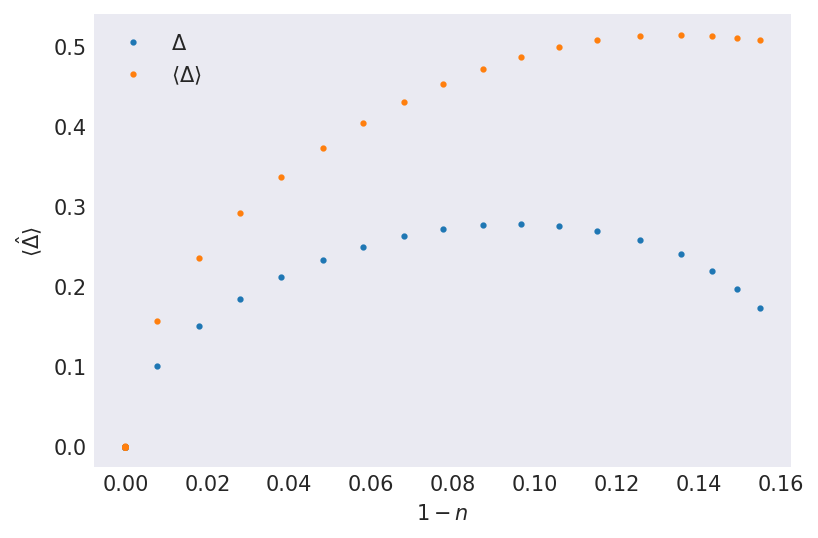

In [13]:
fig, ax = plt.subplots()

ax.plot(1-vca_data[:,1], vca_data[:,0], 'o', markersize=2, label="$\Delta$")
ax.plot(1-vca_data[:,1], np.abs(vca_data[:,2]), 'o', markersize=2, label="$\langle\Delta\\rangle$")

ax.set_xlabel("$1-n$")
ax.set_ylabel("$\langle\hat\Delta\\rangle$")

ax.legend()

fig.show()


### Conclusion

We can see that the most superconduction is observed for a hole density of $\approx0.095$